In [82]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# CAT-DOG Datasets:
**https://drive.google.com/file/d/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm/view?usp=sharing**

In [41]:
cat4 = cv2.imread('train/CAT/4.jpg')

In [42]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

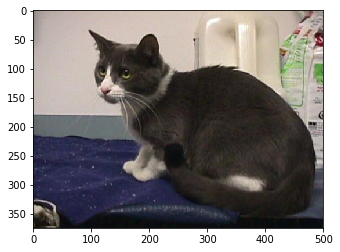

In [43]:
plt.imshow(cat4)

In [44]:
cat4.shape

(375, 500, 3)

In [45]:
dog = cv2.imread('train/DOG/2.jpg')

In [46]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

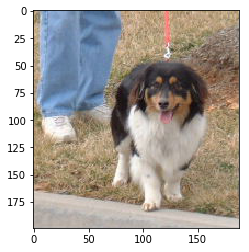

In [47]:
plt.imshow(dog)

In [48]:
dog.shape

(199, 188, 3)

In [49]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

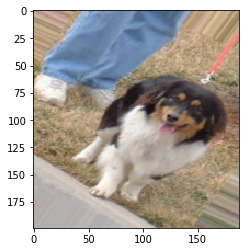

In [51]:
plt.imshow(image_gen.random_transform(dog))

In [52]:
image_gen.flow_from_directory('train/')

Found 18743 images belonging to 2 classes.


In [53]:
from keras.models import Sequential

In [54]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [55]:
input_shape=(150,150,3)

In [56]:
model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                input_shape=(150,150,3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#########################

model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                input_shape=(150,150,3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#########################

model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                input_shape=(150,150,3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#########################

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [58]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('train/',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [59]:
test_image_gen = image_gen.flow_from_directory('test/',
                                              target_size=input_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 6251 images belonging to 2 classes.


In [60]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [62]:
# Train model
# result = model.fit_generator(train_image_gen,
#                             epochs=1,
 #                            steps_per_epoch=150,
  #                           validation_data=test_image_gen,
   #                          validation_steps=12)ç

In [63]:
from keras.models import load_model

In [64]:
new_model = load_model('cat_dog_100epochs.h5')

In [65]:
dog_file = 'test/DOG/10005.jpg'

In [68]:
from keras.preprocessing import image

In [71]:
dog_img = image.load_img(dog_file,
                        target_size=(150,150))

In [72]:
dog_img = image.img_to_array(dog_img)

In [73]:
dog_img.shape

(150, 150, 3)

In [74]:
import numpy as np

In [75]:
dog_img = np.expand_dims(dog_img,
                        axis=0)

In [76]:
dog_img.shape

(1, 150, 150, 3)

In [77]:
dog_img = dog_img/255

In [78]:
dog_img.shape

(1, 150, 150, 3)

In [79]:
model.predict_classes(dog_img)

array([[0]], dtype=int32)

In [80]:
new_model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [81]:
new_model.predict(dog_img)

array([[0.9939143]], dtype=float32)